# Assignment14 Decision Tree (Fraud Data)

### Problem Statement
### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
#importing liabraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.shape

(600, 6)

In [5]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [8]:
df.loc[df["Taxable.Income"] <= 30000,"Taxable.Income1"]="Risky"
df.loc[df["Taxable.Income"] >= 30000,"Taxable.Income1"]="Good"
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
# find categorical variables in training data set

traincategorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(traincategorical)))

print('The categorical variables are :\n\n', traincategorical)

There are 4 categorical variables

The categorical variables are :

 ['Undergrad', 'Marital.Status', 'Urban', 'Taxable.Income1']


In [10]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad']) 
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['Taxable.Income1']= label_encoder.fit_transform(df['Taxable.Income1']) 

In [11]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [12]:
df.drop(['Taxable.Income'], axis=1, inplace=True)

In [13]:
#split the data into dependant and independant variable
X = df.iloc[:,0:5]
y = df['Taxable.Income1']


In [14]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income1, Length: 600, dtype: int32

In [20]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=50) 

In [21]:
#model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
model.get_n_leaves()

4

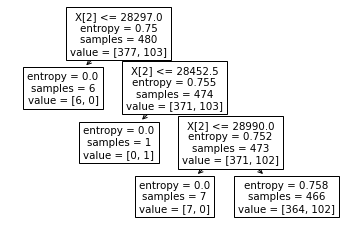

In [23]:
tree.plot_tree(model);

In [24]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    119
1      1
dtype: int64

In [25]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.8166666666666667

In [26]:
result = confusion_matrix(preds, y_test)
print("Confusion Matrix:")
print(result)
result1 = classification_report(preds, y_test)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(preds, y_test)
print("Accuracy:",result2)

Confusion Matrix:
[[98 21]
 [ 1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       119
           1       0.00      0.00      0.00         1

    accuracy                           0.82       120
   macro avg       0.49      0.41      0.45       120
weighted avg       0.98      0.82      0.89       120

Accuracy: 0.8166666666666667


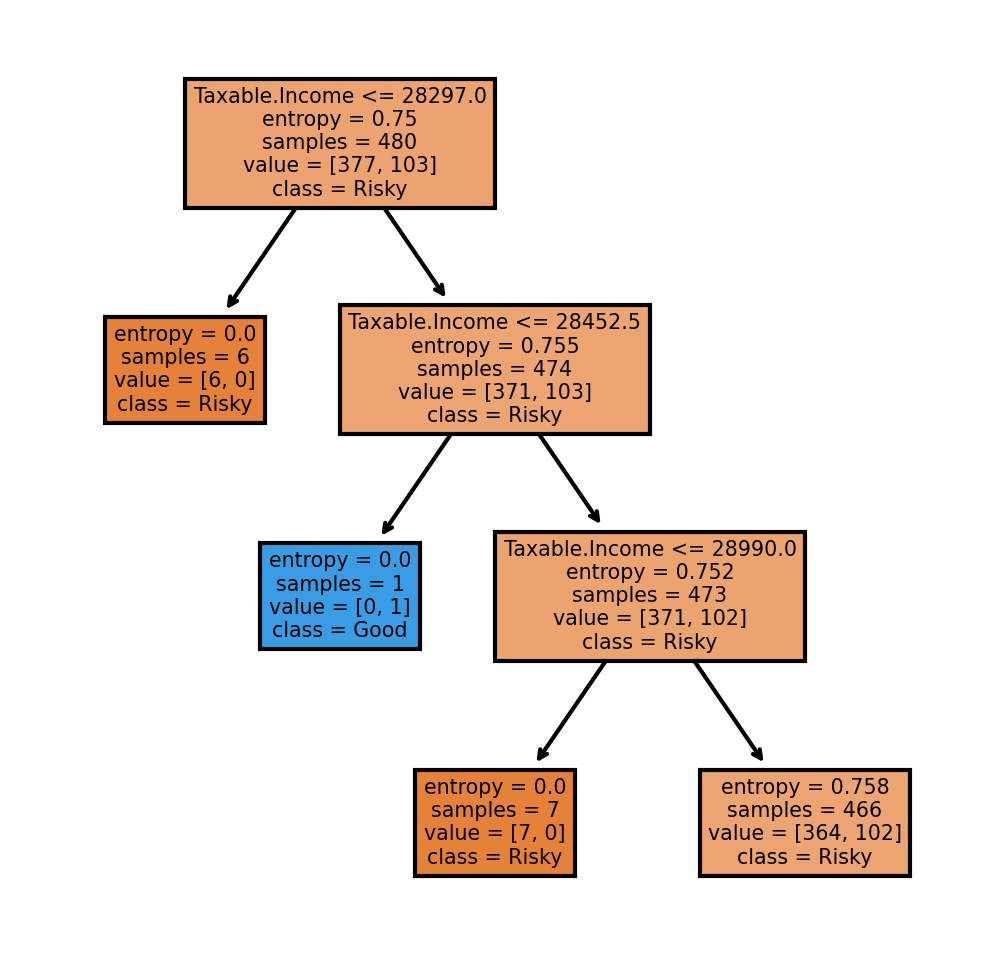

In [27]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban','Taxable.Income1']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);